## A step-by-step guide to Data Visualizations in Python

Follow along with [this article](https://medium.com/codex/step-by-step-guide-to-data-visualizations-in-python-b322129a1540).  We will be using [this .xlsx dataset](https://www.kaggle.com/roshansharma/immigration-to-canada-ibm-dataset) from Kaggle on Immigration to Canada from 1980–2013. No need to dowload it, it is already in the git repositroy you forked.<br>

#### We suggest that instead of copy and pasting the code, you type it out.  This will help you become more familiar with the syntex and better understand it.


### Step-1: Importing Packages

In [1]:
#import all librarys and modules needed
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

#setting style for graphs

plt.rcParams['figure.figsize'] = (20,10)

### Step-2 : Importing and Cleaning Data 

In [2]:
#import and clean data, remember path is data/Canada.xlsx
df = pd.read_excel('Data1/Canada.xlsx')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,International Migration Flows to and from Sele...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,POP/DB/MIG/Flow/Rev.2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))
print()

Unnamed: 0 - 16%
Unnamed: 1 - 39%
Unnamed: 2 - 37%
Unnamed: 3 - 49%
Unnamed: 4 - 39%
Unnamed: 5 - 39%
Unnamed: 6 - 39%
Unnamed: 7 - 39%
Unnamed: 8 - 39%
Unnamed: 9 - 39%
Unnamed: 10 - 39%
Unnamed: 11 - 39%
Unnamed: 12 - 39%
Unnamed: 13 - 39%
Unnamed: 14 - 39%
Unnamed: 15 - 39%
Unnamed: 16 - 39%
Unnamed: 17 - 39%
Unnamed: 18 - 39%
Unnamed: 19 - 39%
Unnamed: 20 - 39%
Unnamed: 21 - 39%
Unnamed: 22 - 39%
Unnamed: 23 - 39%
Unnamed: 24 - 39%
Unnamed: 25 - 39%
Unnamed: 26 - 39%
Unnamed: 27 - 39%
Unnamed: 28 - 39%
Unnamed: 29 - 39%
Unnamed: 30 - 39%
Unnamed: 31 - 39%
Unnamed: 32 - 39%
Unnamed: 33 - 39%
Unnamed: 34 - 39%
Unnamed: 35 - 39%
Unnamed: 36 - 39%
Unnamed: 37 - 98%



In [4]:
df = pd.read_excel('Data1/Canada.xlsx',1, skiprows = range(20), skipfooter = 2)
df.drop(['AREA','REG','DEV','Type','Coverage','DevName'], axis=1, inplace=True)
df.rename(columns = {'OdName':'country','AreaName':'continent','RegName':'region'}, inplace = True)
df['total'] = df.sum(axis = 1)
df = df.set_index('country')
df.rename(index = {'United Kingdom of Great Britain and Northern Ireland':'UK & Ireland'}, inplace = True)
df.columns = df.columns.astype(str)
# Useful for upcoming visualizations
years = list(map(str, range(1980,2013)))
df

C:\Users\Katerina\AppData\Local\Temp\ipykernel_15820\3686329743.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['total'] = df.sum(axis = 1)


,continent,region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,1191,1829,2162,3404,7583,5907,2741,1406,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,1,2,1,6,0,18,7,12,...,161,140,122,133,128,211,160,174,217,2985


### Step-3 : Creating Beautiful Visualizations

#### Line Chart

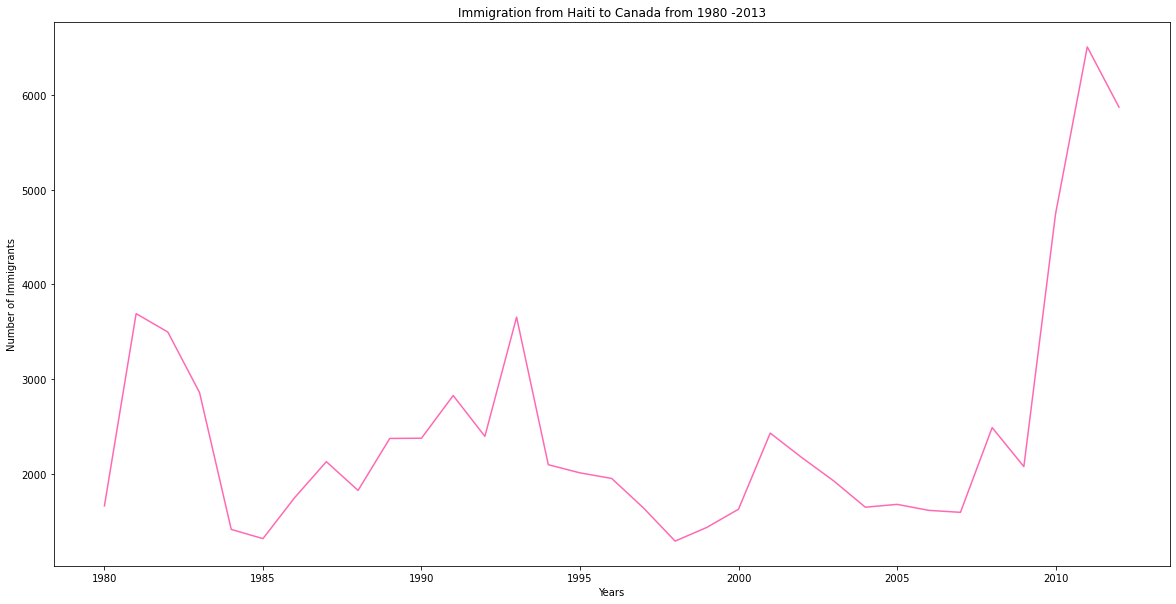

In [5]:
# Single line chart
fig1 = df.loc['Haiti' , years].plot(kind ='line' , color = 'hotpink')
plt.title('Immigration from Haiti to Canada from 1980 -2013' , color = 'k')
plt.xlabel('Years' , color = 'k')
plt.ylabel('Number of Immigrants' , color = 'k')
plt.xticks(color = 'k')
plt.yticks(color = 'k')
plt.savefig('linechart_single.png')

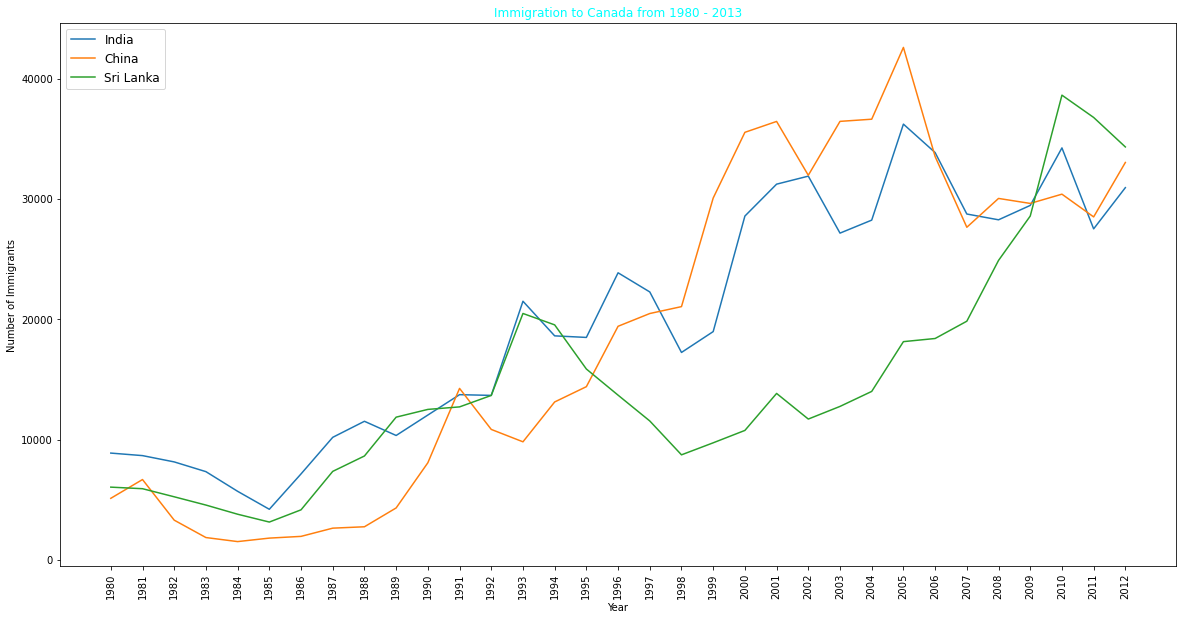

In [6]:
# Multiple Line chart 
fig2 = plt.plot(df.loc['India' , years], label = 'India')
plt.plot(df.loc['China' , years] , label = 'China')
plt.plot(df.loc['Philippines' , years] , label = 'Sri Lanka')
plt.legend(loc = 'upper left' , fontsize = 12)
plt.xticks(rotation = 90 , color = 'black')
plt.yticks(color = 'k')
plt.title('Immigration to Canada from 1980 - 2013' , color = 'cyan')
plt.xlabel('Year' , color = 'k')
plt.ylabel('Number of Immigrants' , color = 'k')
plt.savefig('linechart_multiple.png')
plt.show()

#### Lets talk about style   

In [7]:
#Shows all avaiable built-in styles
print(plt.style.available)



['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


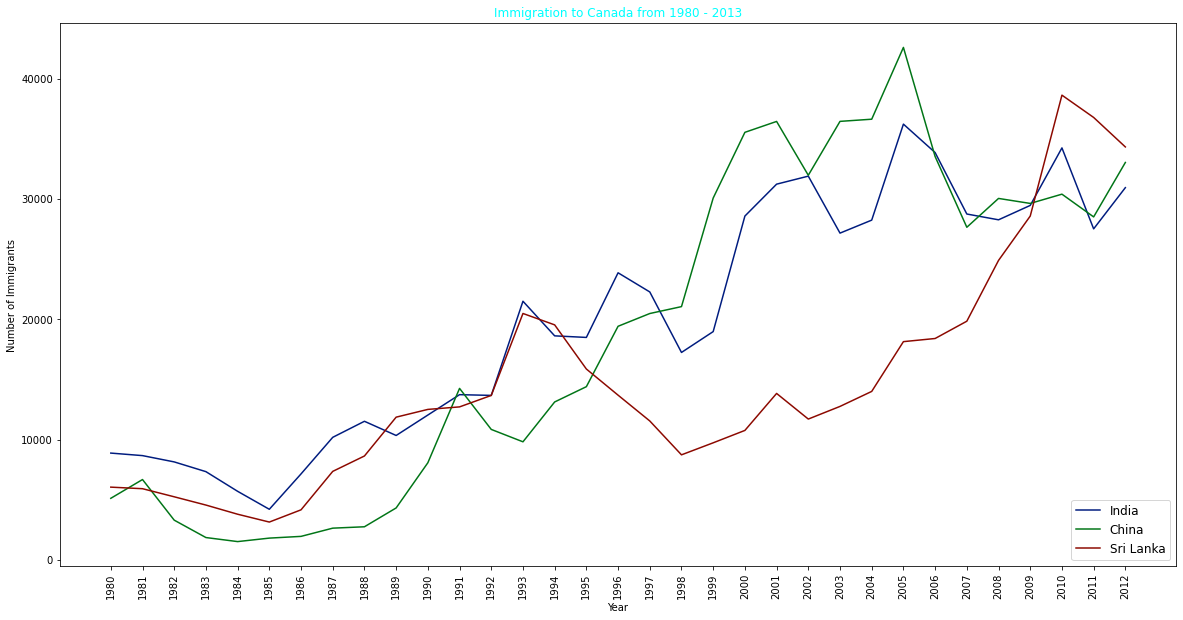

In [8]:
plt.style.use('seaborn-dark-palette')
fig2 = plt.plot(df.loc['India' , years], label = 'India')
plt.plot(df.loc['China' , years] , label = 'China')
plt.plot(df.loc['Philippines' , years] , label = 'Sri Lanka')
# Putting legend on lower right 
plt.legend(loc = 'lower right', fontsize = 12)
plt.xticks(rotation = 90 , color = 'black')
plt.yticks(color = 'k')
plt.title('Immigration to Canada from 1980 - 2013' , color = 'cyan')
plt.xlabel('Year' , color = 'k')
plt.ylabel('Number of Immigrants' , color = 'k')
plt.savefig('linechart_multiple.png')
plt.show()

In [9]:
pip install mplcyberpunk

Note: you may need to restart the kernel to use updated packages.


To see a visualization of the aviable style sheets [click here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). 

Syntex to select a specific style is: plt.style.use('style_name') 

Try it out by adding the line of code to the top of the code block above and choose one of the preinstalled styles. Which style is your favorite?<br><br>

What happens when you change the line- plt.legend(loc = 'upper left', fontsize = 12) to plt.legend(loc = 'lower right', fontsize = 12)? <br><br><br><br>



Experiment changing other lines of the code and see how the graph changes. Add any notes or observations here. Going forward feel free to experiment with each graph type<br><br><br><br><br><br>

#### Install mplcyberpunk
Open a terminal window and at at the prompt type:

python -V

If its python 3.something, copy and paste: pip install mplcyberpunk
If its python 2.something, copy and paste: pip3 install mplcyberpunk


For more info on mplcyberpunk click [here.](https://github.com/dhaitz/mplcyberpunk)

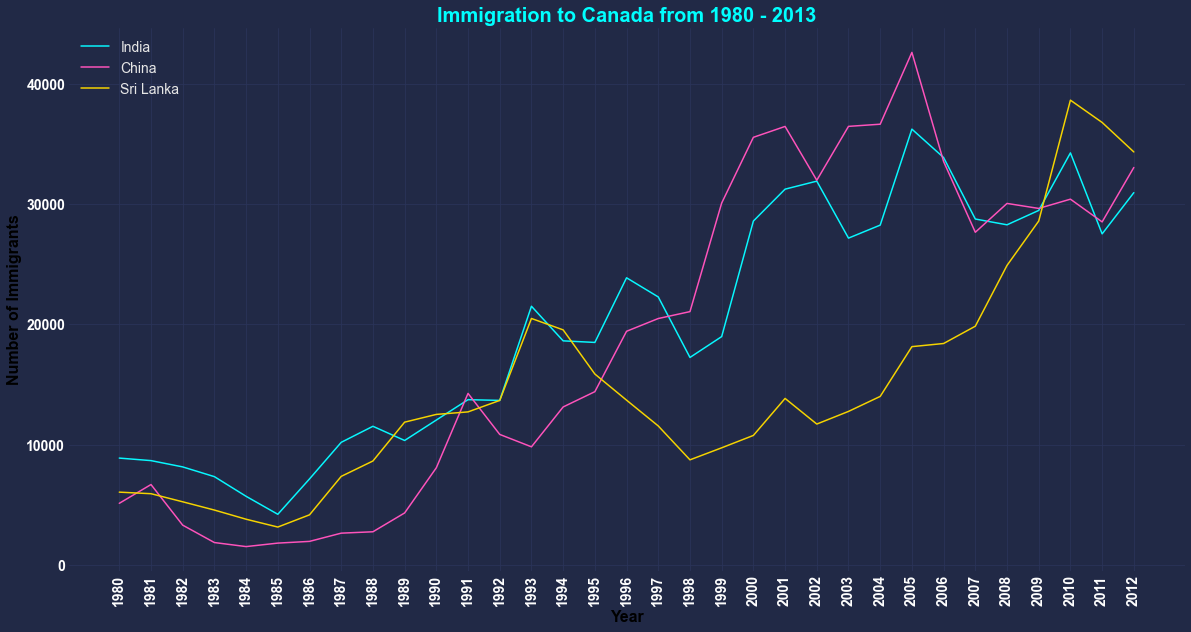

In [10]:
# Cyberpunk Multiple Line Chart

import mplcyberpunk 

style.use('cyberpunk')
fig2 = plt.plot(df.loc['India' , years], label = 'India')
plt.plot(df.loc['China' , years] , label = 'China')
plt.plot(df.loc['Philippines' , years] , label = 'Sri Lanka')
# Putting legend on lower right 
plt.legend(loc = 'upper left', fontsize = 14)
plt.xticks(rotation = 90 , color = 'white' , fontsize = 14 , fontweight = 'bold' )
plt.yticks(color = 'white' , fontsize = 14, fontweight = 'bold')
plt.title('Immigration to Canada from 1980 - 2013' , color = 'cyan' , fontsize = 20, fontweight = 'bold')
plt.xlabel('Year' , color = 'k' , fontsize = 16 , fontweight = 'bold')
plt.ylabel('Number of Immigrants' , color = 'k' , fontsize = 16 , fontweight ='bold')
plt.savefig('linechart_multiple.png')
plt.show()


#### Bar Chart

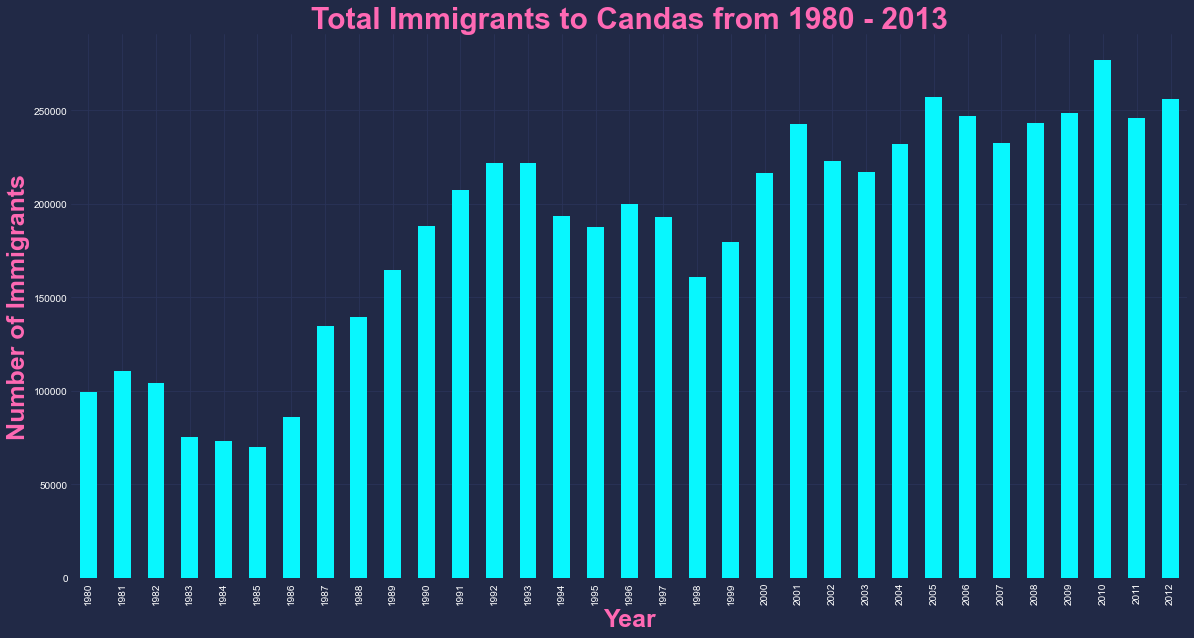

In [11]:
# Vertical bar chart
# Do not change the style back to ggplot 
# delete the style.use('ggplot') line of code

df_tot = pd.DataFrame(df.loc[: , years].sum())
df_tot.rename(columns = {0 : 'total'} , inplace = True)

df_tot.plot(kind = 'bar' , legend = False)
plt.title ('Total Immigrants to Candas from 1980 - 2013' , color = 'hotpink' , fontsize = 30 , fontweight = 'bold')
plt.xticks(color = 'w')
plt.yticks(color = 'white')
plt.xlabel('Year' , color = 'hotpink' , fontsize = 25, fontweight = 'bold')
plt.ylabel('Number of Immigrants', color = 'hotpink' , fontsize = 25 , fontweight = 'bold')
plt.savefig('bar_vertical.png')


Notice that style is still set to cyberpunk.  How do we fix it so we can see the labels?<br> <br>

Answer: change the color = 'black' to 'white'

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

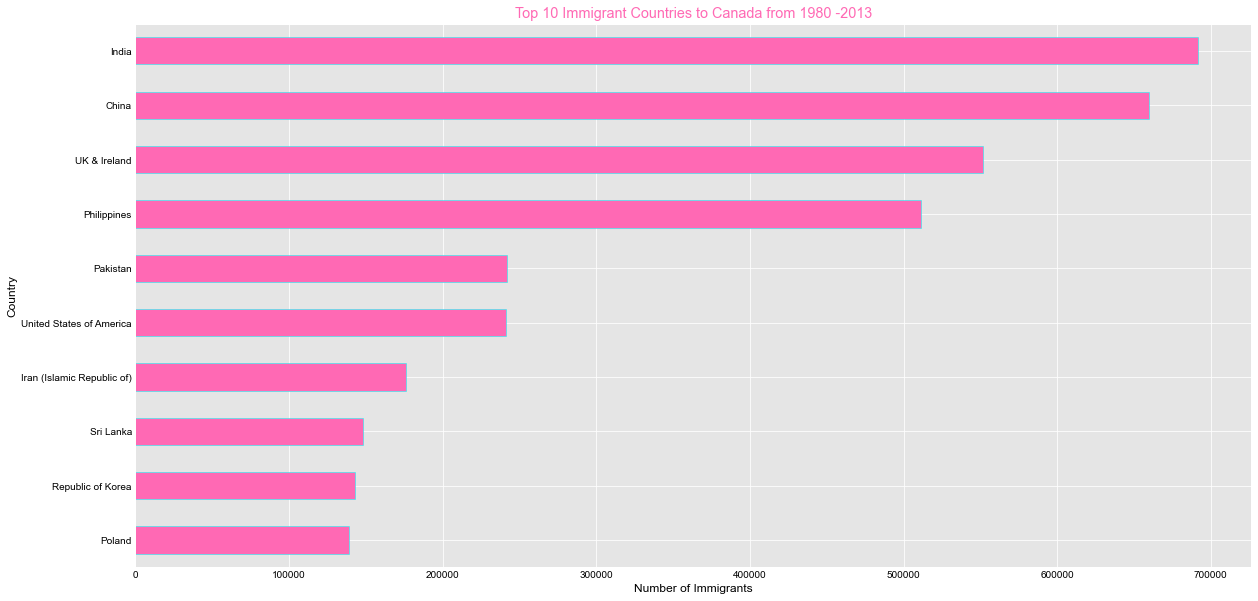

In [12]:
# Horizontal bar chart
#change style back to ggplt
style.use('ggplot')
df_top10 = pd.DataFrame(df.nlargest(10 , 'total')['total']. sort_values(ascending = True))

df_top10.plot.barh(legend = False , color = 'hotpink' , edgecolor = 'cyan')
plt.title('Top 10 Immigrant Countries to Canada from 1980 -2013' , color = 'hotpink')
plt.xlabel('Number of Immigrants' , color = 'k')
plt.ylabel('Country' , color = 'k')
plt.xticks(color ='k')
plt.yticks(color = 'k')
plt.savefig('bar_horizontal.png')

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

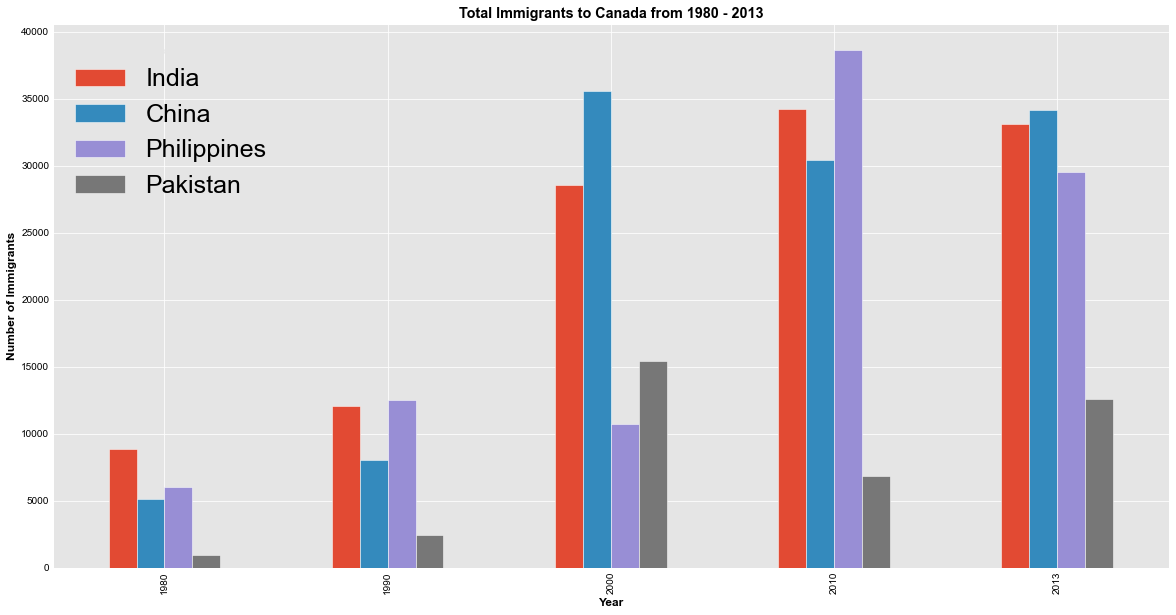

In [13]:
# Grouped bar chart
year_int10 = list(map(str , (1980,1990,2000,2010,2013)))
df_group = pd.DataFrame(df.loc[['India' , 'China' , 'Philippines' , 'Pakistan'] , year_int10].T)

df_group.plot.bar(edgecolor = 'w')
plt.title('Total Immigrants to Canada from 1980 - 2013' , color = 'k', fontweight = 'bold')
plt.xticks(color = 'black')
plt.yticks(color = 'k')
plt.xlabel('Year' , color = 'k' , fontweight = 'bold')
plt.ylabel('Number of Immigrants' , color = 'k' , fontweight = 'bold')
plt.legend(title = 'Country', fontsize = 25 , labelcolor = 'k')
plt.savefig('bar_grouped.png')


Notice how the labels in the legend have disapeared?  We can fix this by adding labelcolor='k' to plt.legend<br>
<br>plt.legend(title = 'Country', fontsize = 12, labelcolor='black')

# For legend to change color you put legendcolor. For other color changes just color

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>
# For legend to change color you put legendcolor. For other color changes just color

#### Area Chart

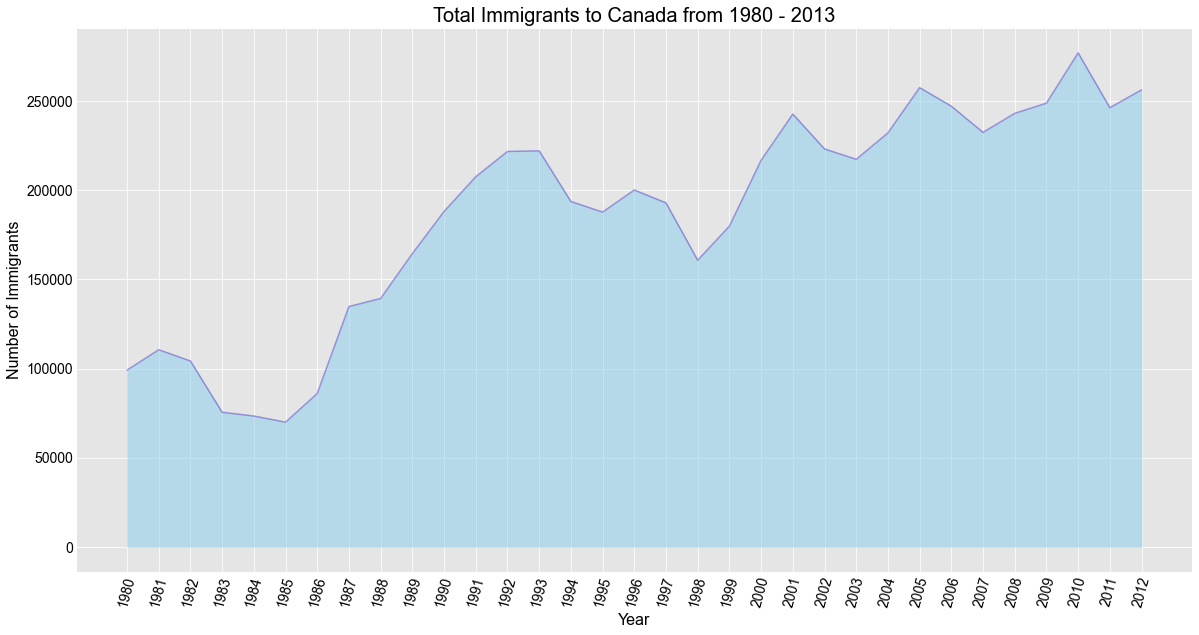

In [14]:
# Area Chart
plt.fill_between(df_tot.index , df_tot['total'] , color = 'skyblue' , alpha= 0.5)
plt.plot(df_tot.index, df_tot['total'] , color = 'Slateblue' , alpha = 0.6)
plt.title('Total Immigrants to Canada from 1980 - 2013' , fontsize = 20 , color = 'k')
plt.yticks(fontsize = 14 , color = 'k')
plt.xticks(fontsize = 14 , rotation = 75, color = 'k')
plt.xlabel('Year' , fontsize = 16 , color = 'k')
plt.ylabel('Number of Immigrants' , fontsize = 16 , color = 'k')
plt.savefig ('area_simple.png')


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>
# rotation on plt.xlabel rotated the labels to certain degree 
# alpha changes how sheer a line or area is. can only fo from 0-1 by decimals 

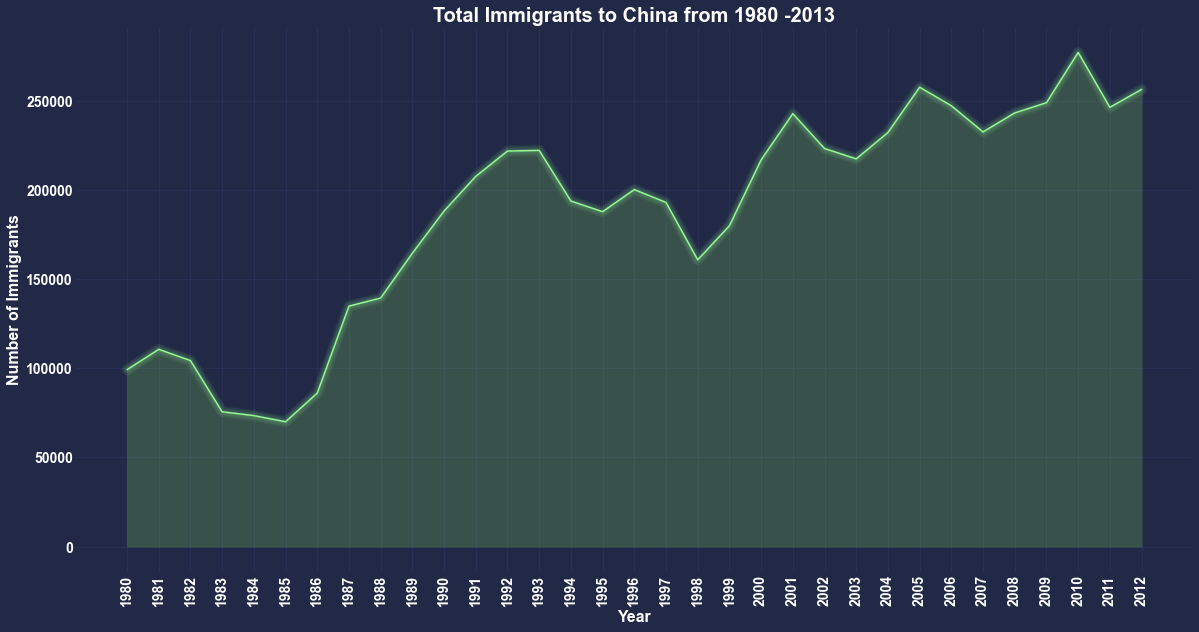

In [15]:
# cyberpunk simple area chart
import mplcyberpunk

style.use('cyberpunk')

plt.fill_between(df_tot.index , df_tot['total'] , color = 'greenyellow' , alpha = 0.1)
plt.plot(df_tot.index , df_tot['total'] , color = 'palegreen' , alpha = 1)
mplcyberpunk.add_glow_effects()
plt.title('Total Immigrants to China from 1980 -2013', fontsize = 20 , fontweight = 'bold' , color = 'w' )
plt.yticks(fontsize = 14 , color = 'w' , fontweight = 'bold')
plt.xticks(fontsize = 14 , rotation = 90 , color = 'w' , fontweight = 'bold')
plt.xlabel('Year' , fontsize = 16 , color = 'w' , fontweight = 'bold')
plt.ylabel('Number of Immigrants' , fontsize = 16 , color = 'w' , fontweight = 'bold')
plt.savefig('cyber_area_simple.png')


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

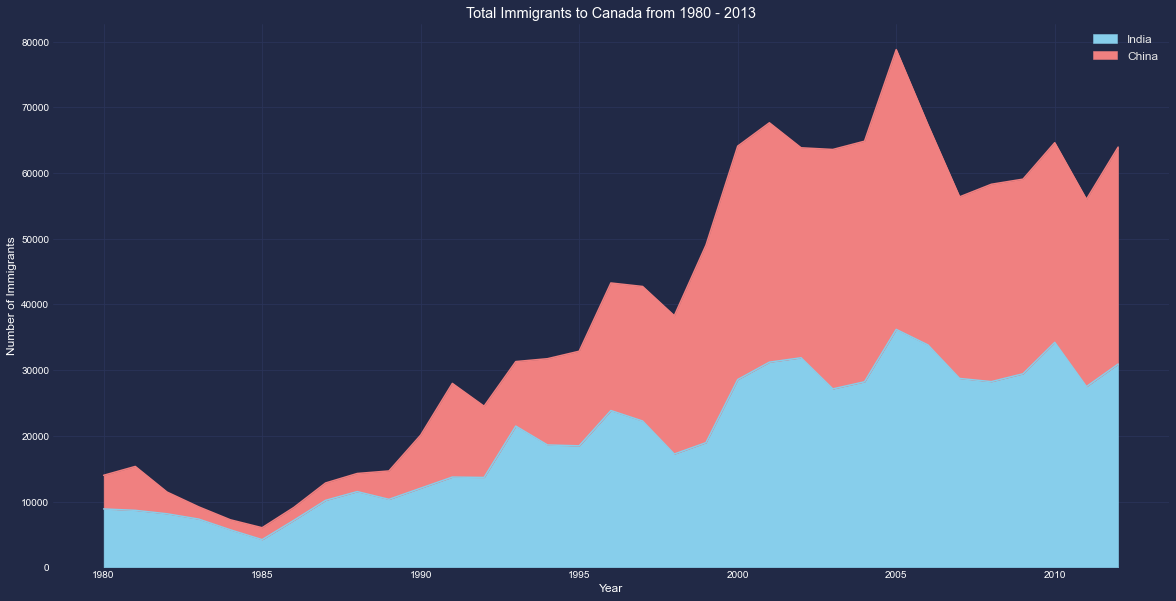

In [16]:
# stacked area chart
color = ['skyblue' , 'lightcoral']
top2_list = df.nlargest(2, 'total'). index.tolist()
df_top2 = pd.DataFrame(df.loc[top2_list, years].T)

df_top2.plot(kind = 'area' , stacked = True, color = color)
plt.title('Total Immigrants to Canada from 1980 - 2013' , color = 'w')
plt.legend(fontsize = 12)
plt.xlabel('Year' , color = 'w')
plt.ylabel('Number of Immigrants' , color = 'w')
plt.xticks(color = 'w')
plt.yticks(color ='w')
plt.savefig('area_stacked.png')

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

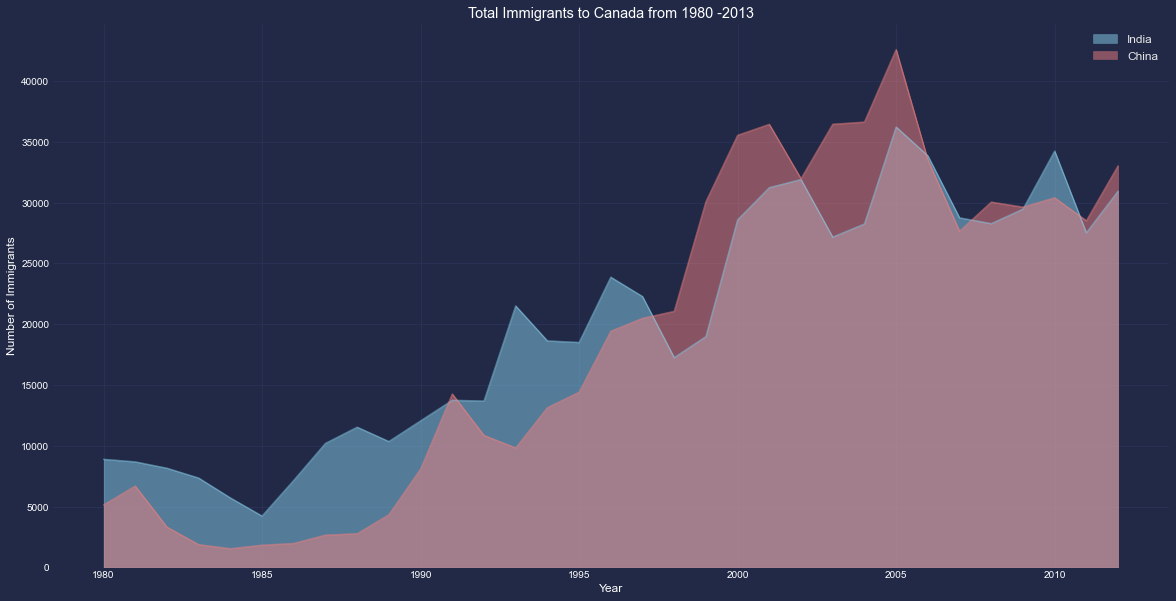

In [17]:
# unstacked area chart
df_top2.plot(kind='area' , stacked = False , color = color)
plt.title('Total Immigrants to Canada from 1980 -2013', color = 'w')
plt.xlabel('Year', color = 'w')
plt.ylabel('Number of Immigrants' , color = 'w')
plt.legend(fontsize = 12)
plt.xticks(color = 'w')
plt.yticks(color = 'w')
plt.savefig('area_unstacked.png')

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Box Plot

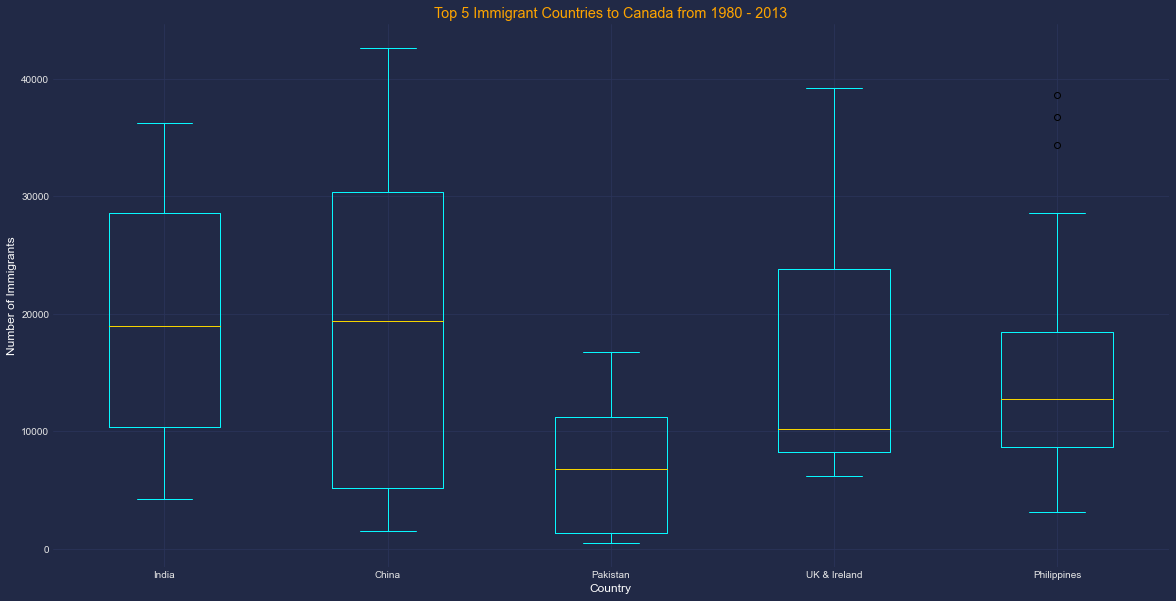

In [18]:
# Vertical Box Plot
df_box = pd.DataFrame(df.loc[['India', 'China', 'Pakistan', 'UK & Ireland' , 'Philippines' ], years].T)

df_box.plot(kind ='box')
plt.title('Top 5 Immigrant Countries to Canada from 1980 - 2013' , color ='orange')
plt.xlabel('Country' , color = 'w')
plt.ylabel('Number of Immigrants' , color ='w')
plt.savefig('box_vertical.png')


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

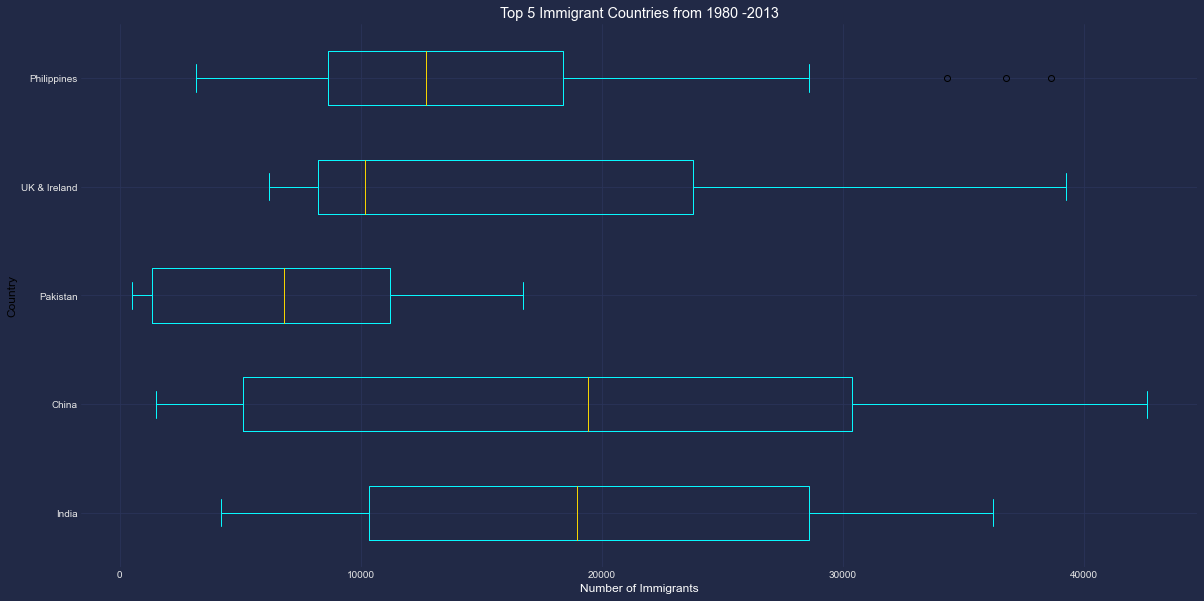

In [19]:
# horizontal box plot
df_box.plot(kind = 'box' , vert =False)
plt.title('Top 5 Immigrant Countries from 1980 -2013' , color = 'w')
plt.ylabel('Country' , color ='k')
plt.xlabel('Number of Immigrants' , color = 'w')
plt.savefig('box_horizontal.png')

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Scatter Plot

With the newist version of Seaborn we have to specify x and y.

example: sb.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df_iris)

C:\Users\Katerina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


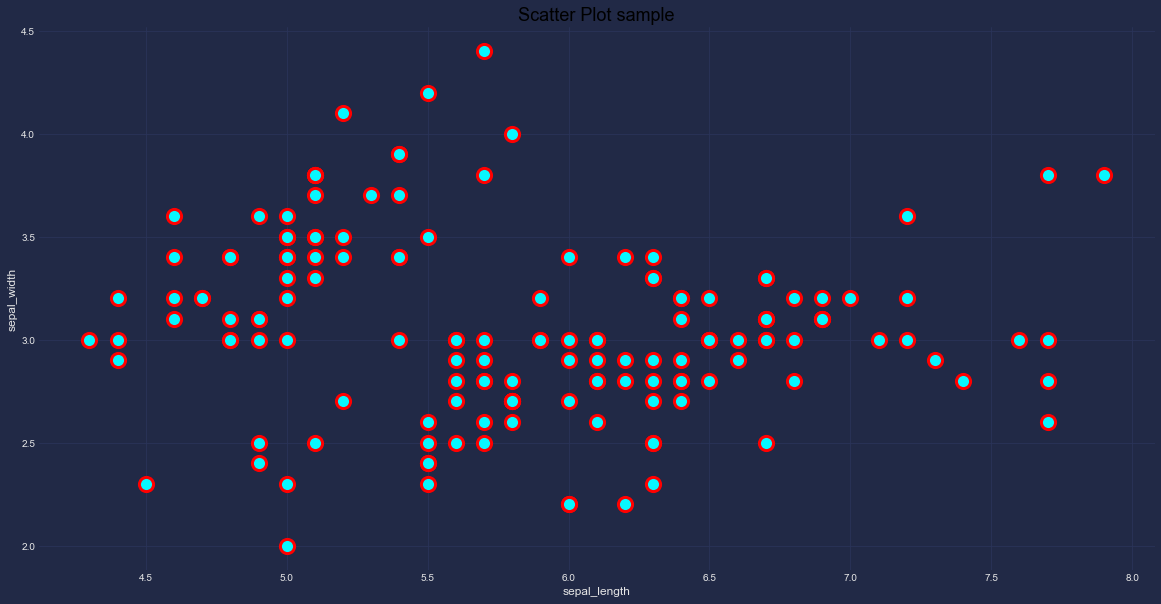

In [20]:
#scatter plot comparing sepal length to sepal width
df_iris = sb.load_dataset('iris')
sb.scatterplot('sepal_length' , 'sepal_width' , data = df_iris , s = 200 ,linewidth = 3 , edgecolor = 'Red')
plt.title('Scatter Plot sample' , color = 'k' , fontsize = 18)
plt.savefig('scatter.png')                

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Histogram

With the newist version of Seaborn they have deprecated distplot. Replace distplot with histplot and add kde = True

example:
sb.histplot(df_iris['sepal_length'], color = 'Red', label = 'Sepal Length', kde = True)

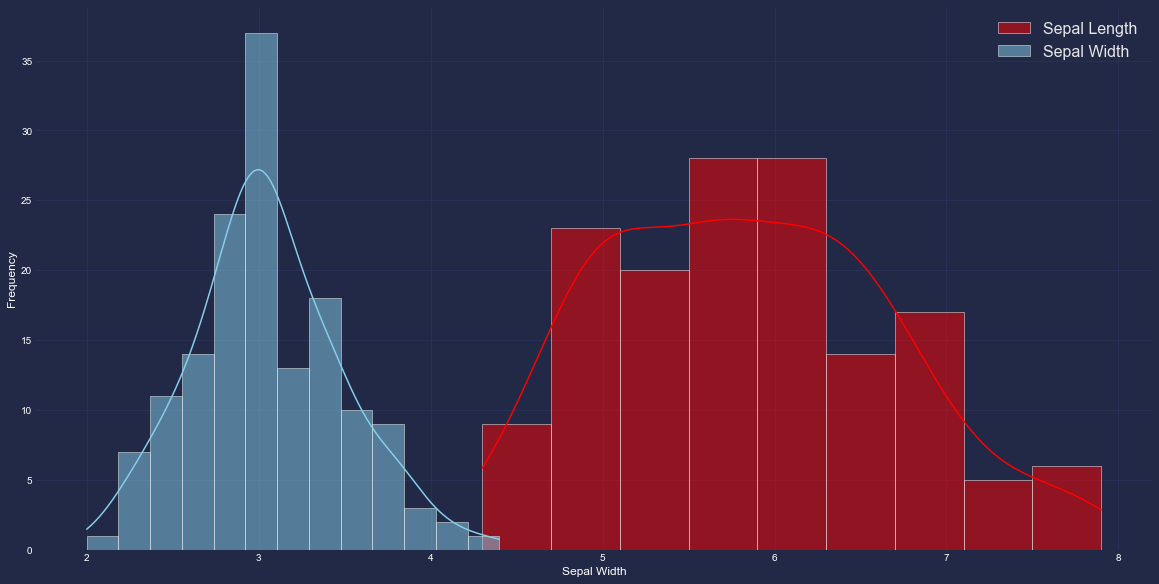

In [21]:
#Histogram side by side, with kde
df_iris = sb.load_dataset('iris')

sb.histplot(df_iris['sepal_length'], color = 'Red' , label = 'Sepal Length', kde = True)
sb.histplot(df_iris['sepal_width'], color = 'skyblue', label = 'Sepal Width', kde =True )
plt.legend(fontsize = 16)
plt.xlabel('Sepal Width' , color = 'w')
plt.ylabel('Frequency' , color = 'w')
plt.xticks(color = 'w')
plt.yticks(color = 'w')
plt.savefig('distplot.png')

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Bubble Plot

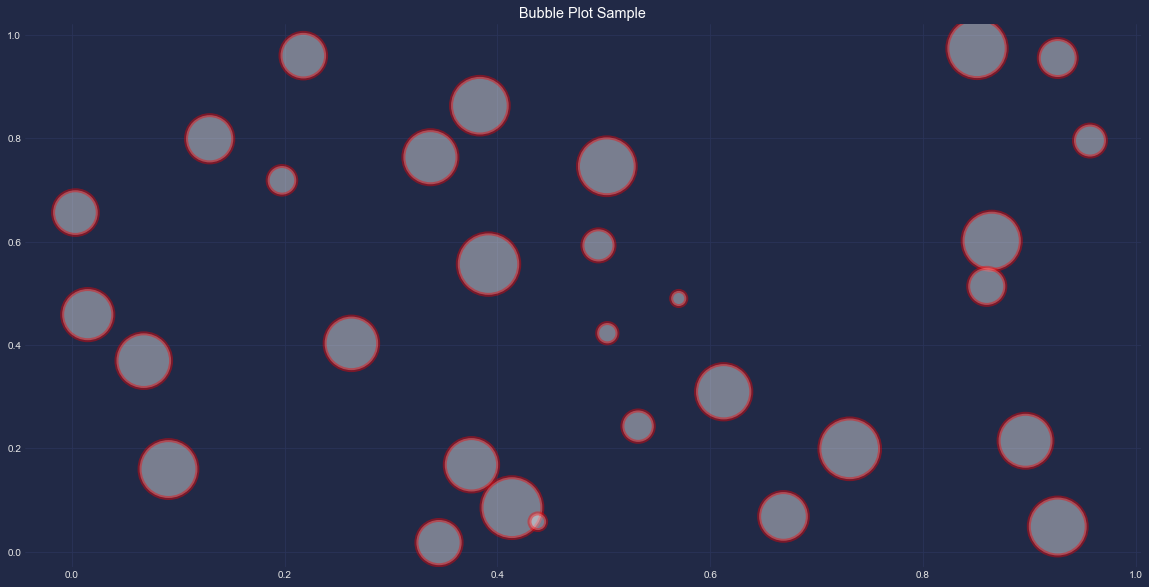

In [22]:
# Bubble Plot
x = np.random.rand(1 ,30 , 1)
y = np.random.rand(1, 30, 1)
size = np.random.rand(1 , 30 , 1)

plt.scatter(x , y, s = size*4000 , alpha = 0.4 , color = 'w' , edgecolor = 'Red', linewidth = 4)
plt.title('Bubble Plot Sample' , color = 'w')
plt.savefig('bubble.png')


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Pie Chart

Skip this one as the code throws an error. 

df_pie = pd.DataFrame(df.groupby('continent')['total'].sum().T)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode = [0,0.1,0,0,0.1,0.1]

plt.pie(df_pie, colors = colors, autopct = '%1.1f%%', startangle = 90, explode = explode, pctdistance = 1.12, shadow = True)
plt.title('Continent-Wise Immigrants Distribution', color = 'black', y = 1.1, fontsize = 18)
plt.legend(df_pie.index, loc = 'upper left', fontsize = 12)
plt.axis('equal')
plt.savefig('pie.png')

plt.show()

#### Doughnut Chart

ValueError: x must be 1D

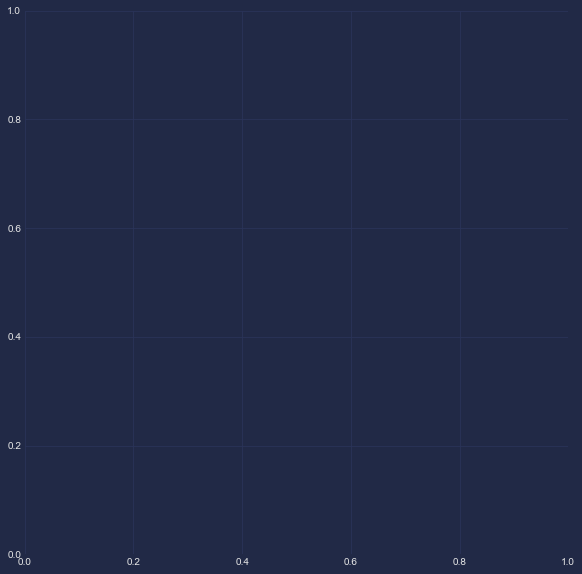

In [23]:
# Doughnut Chart
df_pie = pd.DataFrame(df.groupby('continent')['total'].sum().T)
colors =['gold' , 'yellowgreen', 'lightcoral' , 'lightskyblue' , 'lightgreen' , 'pink']
explode = [0,0.1,0,0,0.1,0.1]

plt.pie(df_pie, colors = colors , startangle = 90 , explode = explode , pctdistance = 1.12, shadow = True)
plt.title('Continent-Wise Immigrants Distribution' , color = ' w', y = 1.1, fontsize = 18 )
plt.legend(df_pie.index, loc = 'upper left', fontsize = 12)
plt.axis('equal')
plt.savefig('pie.png')


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Regression Plot

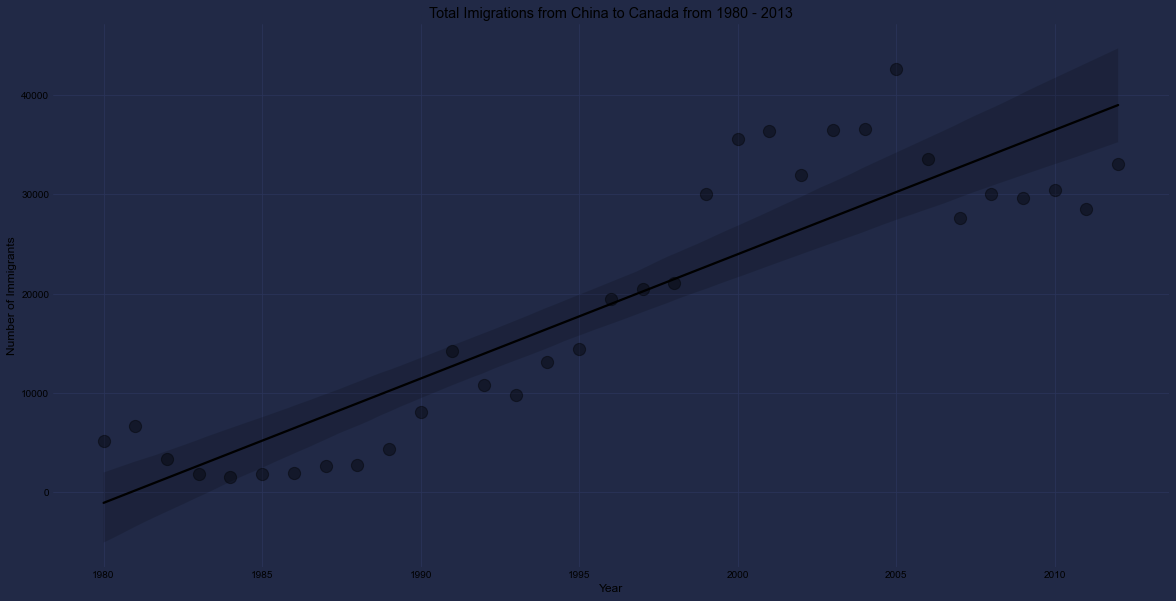

In [26]:
# Strong trend
df_reg = pd.DataFrame(df.loc['China' , years])
df_reg.reset_index(inplace = True)
df_reg.rename(columns = {'index' : 'year'} , inplace = True)
df_reg[['year' , 'China']] = df_reg[['year' , 'China']].astype(int)

sb.regplot(x='year' , y='China' , data = df_reg , color = 'k' , scatter_kws = {'s' : 150, 'alpha':0.4})
plt.title('Total Imigrations from China to Canada from 1980 - 2013' , color = 'black')
plt.ylabel('Number of Immigrants' , color = 'black')
plt.xlabel('Year' , color ='black')
plt.xticks(color = 'black')
plt.yticks(color='black')
plt.savefig('reg_strong.png')


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

In [ ]:
# Weak trend
df_reg1 = pd.DataFrame(df.loc[['Denmark' , 'Norway' , 'Sweden'], years].sum())
df_reg1.reset_index(inplace = True)
df_reg1.rename(columns = {'index' : 'year' , 0: 'total'} , inplace = True)
df_reg1[['year' , 'total']] = df_reg1[['year' , 'total']].astype(int)

sb.regplot(x = 'year' ,y = 'total' , data = df_reg1 , color = 'Red' ,scatter_kws = {'s' : 150 , 'alpha' : 0.4})
plt.title('Total Immigrants from Scandinavia to Canada from 1980 - 2013' , color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.ylabel('Number of Immigrants' , color = 'black')
plt.xlabel('Year' , color = 'black')
plt.savefig('reg_weak.png')


Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Word Cloud

You might need to pip install wordcloud and pip install Pywaffle.  Follow the instruction from when you installed cyperpunk earlier.

Make sure to add the txt files from [here](https://github.com/codinglikeagirl42/DataVisualizationPython) to your data folder and remember the path is data/filename.txt. Try creating your own txt file to visualize.

In [ ]:
# word cloud

pip install wordcloud


In [ ]:
pip install Pywaffle

In [24]:
from wordcloud import WordCloud, STOPWORDS
text = open('sample.txt' , 'r' , encoding = 'utf=8').read()
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white' , max_words = 200 , stopwords = stopwords)
wordcloud.generate(text)
fig18 = plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axi('off')
plt.savefig('wordcloud.png')


ModuleNotFoundError: No module named 'wordcloud'

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

#### Lollipop Chart

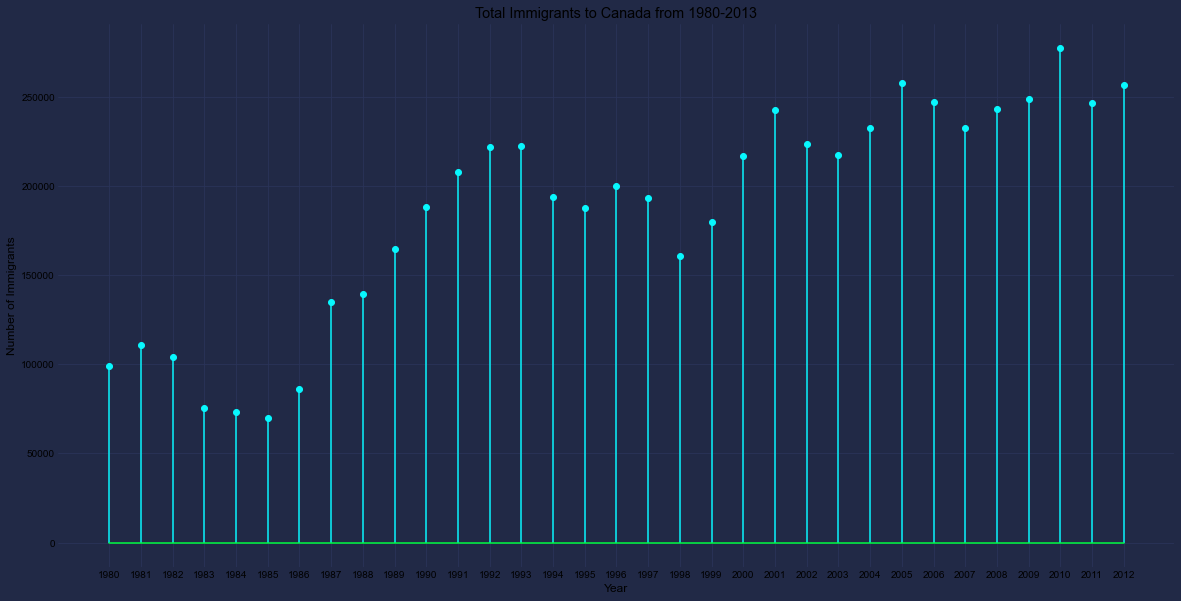

In [25]:
# Lollipop chart
fig19 = plt.stem(df_tot.index, df_tot['total'])
plt.title('Total Immigrants to Canada from 1980-2013', color = 'black')
plt.xlabel('Year', color = 'black')
plt.ylabel('Number of Immigrants', color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.savefig('lollipop.png')

Feel free to experiment and add any notes or observations here. <br><br><br><br><br>

In [ ]:
df_reg = 